In [1]:
import numpy as np
import pandas as pd
from kaggle_hm.utils import init_nb, plot_item, visualize_items

init_nb()

In [2]:
customers = pd.read_parquet('../data/clean/customers.parquet')
items = pd.read_parquet('../data/clean/articles.parquet')
t_ext = pd.read_parquet('../data/clean/transactions.parquet')
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
t_ext['season'] = t_ext['t_dat'].dt.month.map(season_map)

In [6]:
t_ext = t_ext.merge(customers[['customer_id', 'age']], on='customer_id')

# Global top

In [7]:
sales = t_ext.groupby('article_id', observed=True).agg(
    sold_count=('customer_id', 'count'),
    customers_count=('customer_id', 'nunique')
).reset_index()

In [8]:
top_items = sales.sort_values('sold_count', ascending=False)[:20]
top_items

article_id  sold_count  customers_count
233   0706016001       50287            32251
232   0706016002       35043            25485
119   0372860001       31718            25559
1295  0610776002       30199            22571
612   0759871002       26329            21613
969   0464297007       25025            18554
2084  0372860002       24458            20038
715   0610776001       22451            16854
997   0399223001       22236            15929
234   0706016003       21241            16235
4569  0720125001       21063            17611
1377  0156231001       21013            10252
1500  0562245046       20719            16032
2097  0562245001       20464            14982
4     0351484002       20415            14996
3279  0399256001       20242            15047
1093  0673396002       19834            17147
2306  0568601006       19379            15158
1316  0448509014       19216            13843
731   0673677002       19143            16694

../data/images/061/0610776002.jpg not found
../data/images/061/0610776001.jpg not found


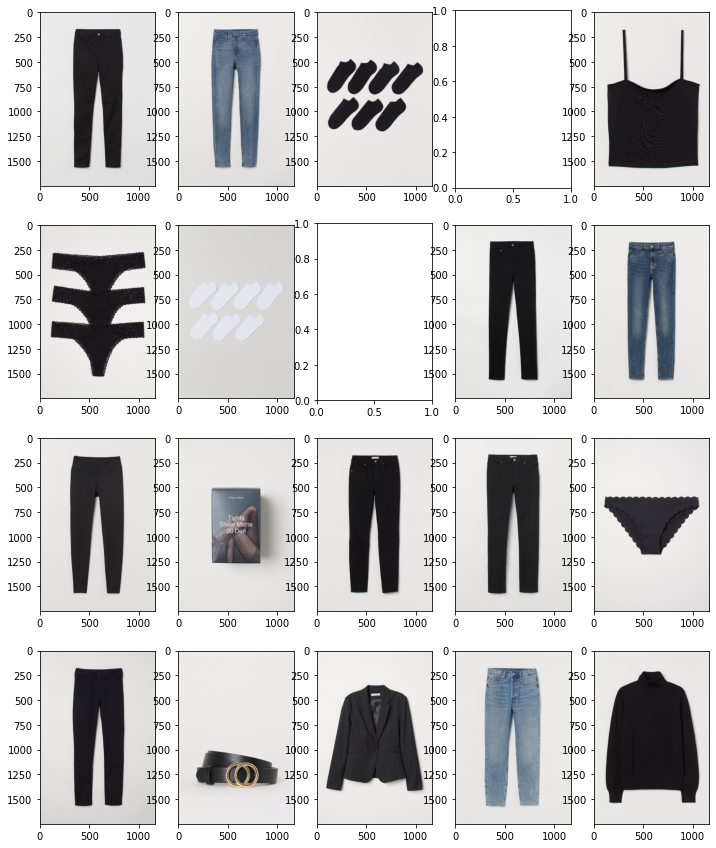

In [17]:
visualize_items(top_items['article_id'], rows=4, columns=5)

# Seasonal tops

In [18]:
sales_season = t_ext.groupby(['article_id', 'season'], observed=True).agg(
    sold_count=('customer_id', 'count'),
    customers_count=('customer_id', 'nunique')
).reset_index()

In [20]:
sales_season.head()

article_id  season  sold_count  customers_count
0  0663713001  Autumn         426              365
1  0663713001  Spring           3                3
2  0663713001  Summer           1                1
3  0663713001  Winter         203              189
4  0541518023  Autumn         242              235

## Winter

In [21]:
top_winter = sales_season[sales_season['season'] == 'Winter'].sort_values('sold_count', ascending=False)[:20]
top_winter

article_id  season  sold_count  customers_count
870    0706016001  Winter       14912            11252
866    0706016002  Winter       10335             8237
13620  0689109001  Winter        8273             5505
874    0706016003  Winter        7542             6051
3555   0464297007  Winter        7330             5939
10508  0608776002  Winter        7168             6134
441    0372860001  Winter        7168             6334
3234   0158340001  Winter        7022             4135
5026   0156231001  Winter        7016             4077
1263   0537116001  Winter        6639             5655
13644  0692930001  Winter        6521             4575
3655   0399223001  Winter        6173             5036
5479   0562245046  Winter        5863             4938
16719  0720125001  Winter        5753             5013
11795  0111586001  Winter        5699             3596
2672   0673677002  Winter        5688             5178
12066  0399256001  Winter        5621             4524
11799  0111593001  Winter        5349             3317
4005   0673396002  Winter        5313             4688
8465   0568601006  Winter        5043             4051

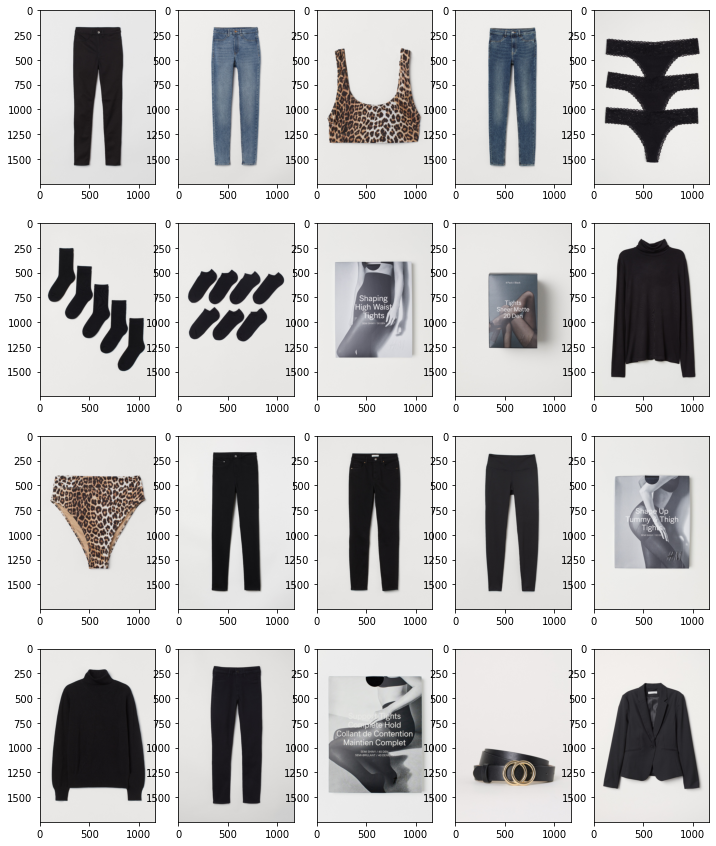

In [22]:
visualize_items(top_winter['article_id'], rows=4, columns=5)

## Spring

In [23]:
top_spring = sales_season[sales_season['season'] == 'Spring'].sort_values('sold_count', ascending=False)[:20]
top_spring

article_id  season  sold_count  customers_count
868    0706016001  Spring       12185             9346
4729   0610776002  Spring       11529             9128
864    0706016002  Spring       11065             8892
2621   0610776001  Spring        9821             7732
9218   0741356002  Spring        8964             6908
2243   0759871002  Spring        8960             7701
17     0351484002  Spring        8694             6494
439    0372860001  Spring        8414             7426
7636   0372860002  Spring        8076             7010
17368  0688537004  Spring        7973             6284
3802   0688537011  Spring        7770             6076
2986   0590928001  Spring        7492             5688
3813   0684209013  Spring        7478             5895
37541  0684209004  Spring        7128             5724
37548  0599580055  Spring        7118             5191
12367  0599580017  Spring        6598             5248
9442   0716672001  Spring        6352             5399
432    0160442010  Spring        6326             4039
16717  0720125001  Spring        6019             5221
2167   0759871001  Spring        5892             5163

../data/images/061/0610776002.jpg not found
../data/images/061/0610776001.jpg not found


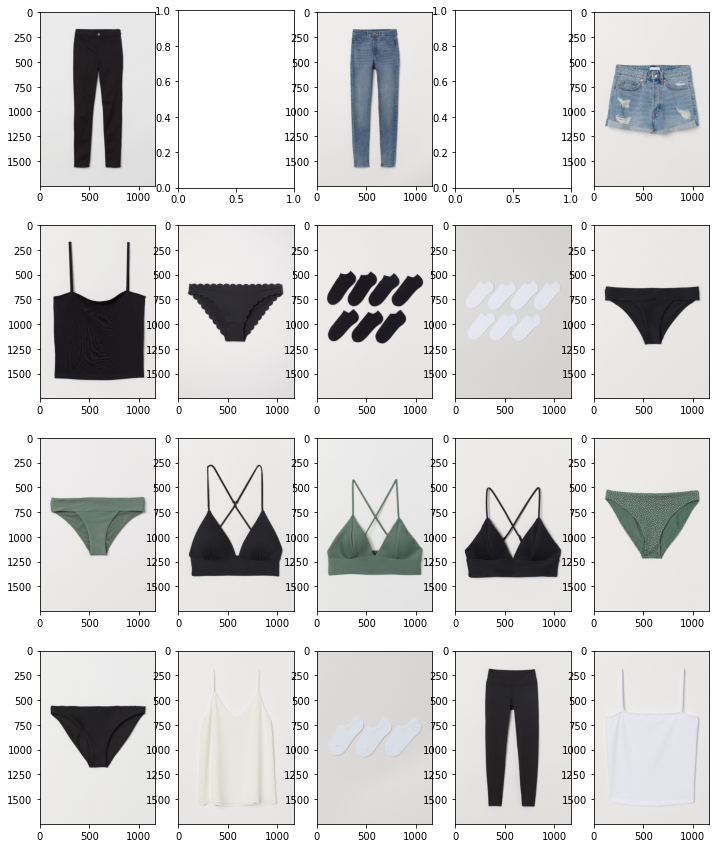

In [24]:
visualize_items(top_spring['article_id'], rows=4, columns=5)

## Summer

In [25]:
top_summer = sales_season[sales_season['season'] == 'Summer'].sort_values('sold_count', ascending=False)[:20]
top_summer

article_id  season  sold_count  customers_count
2244   0759871002  Summer       11825            10099
869    0706016001  Summer       10129             7372
7637   0372860002  Summer        9124             8048
440    0372860001  Summer        8230             7241
17369  0688537004  Summer        7921             6358
4730   0610776002  Summer        7889             6387
4464   0751471001  Summer        7453             5798
6883   0717490008  Summer        7359             6550
6713   0783346001  Summer        7303             5748
6527   0749699002  Summer        7274             6169
3554   0464297007  Summer        6790             5535
2622   0610776001  Summer        6609             5313
37542  0684209004  Summer        6493             5458
865    0706016002  Summer        6418             5277
7062   0733749001  Summer        5842             4996
12368  0599580017  Summer        5774             4720
4004   0673396002  Summer        5761             5065
7545   0554479005  Summer        5652             4748
18     0351484002  Summer        5624             4458
14548  0656763001  Summer        5537             4763

../data/images/061/0610776002.jpg not found
../data/images/061/0610776001.jpg not found


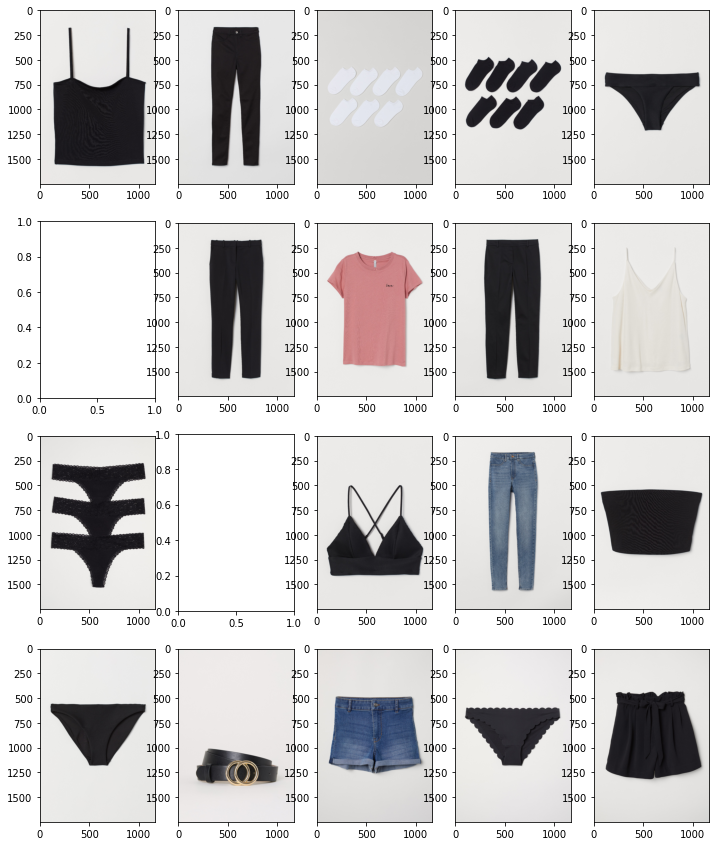

In [26]:
visualize_items(top_summer['article_id'], rows=4, columns=5)

## Autumn

In [27]:
top_autumn = sales_season[sales_season['season'] == 'Autumn'].sort_values('sold_count', ascending=False)[:20]
top_autumn

article_id  season  sold_count  customers_count
867    0706016001  Autumn       13061             9823
2669   0673677002  Autumn       11757            10469
3652   0399223001  Autumn       10254             7913
8462   0568601006  Autumn        8302             6539
7685   0562245001  Autumn        8123             6395
5023   0156231001  Autumn        8009             4586
438    0372860001  Autumn        7906             7003
5476   0562245046  Autumn        7568             6236
3231   0158340001  Autumn        7336             4533
863    0706016002  Autumn        7225             5922
33519  0772902001  Autumn        7190             6144
10505  0608776002  Autumn        7173             6130
12063  0399256001  Autumn        6842             5522
4728   0610776002  Autumn        6224             4910
3449   0399223029  Autumn        5962             4549
871    0706016003  Autumn        5887             4870
11792  0111586001  Autumn        5877             3657
3770   0591334003  Autumn        5867             5233
11796  0111593001  Autumn        5858             3702
15035  0579541001  Autumn        5842             5217

../data/images/061/0610776002.jpg not found


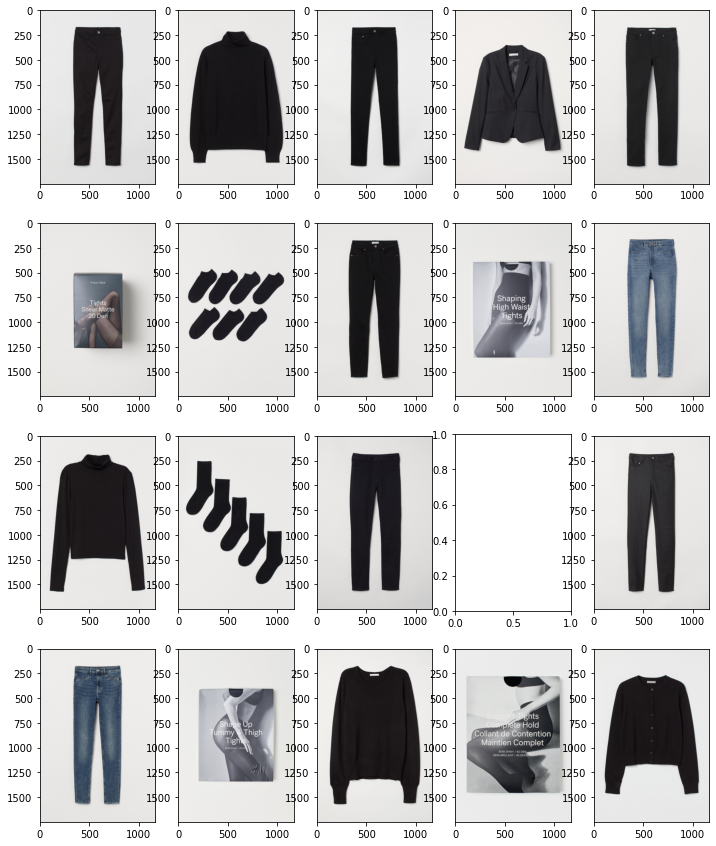

In [28]:
visualize_items(top_autumn['article_id'], rows=4, columns=5)

## Age groups

In [32]:
t_ext['age_group'] = pd.cut(t_ext['age'], bins=np.arange(t_ext['age'].min(), t_ext['age'].max(), 5))

In [33]:
sales_age = t_ext.groupby(['article_id', 'age_group'], observed=True).agg(
    sold_count=('customer_id', 'count'),
    customers_count=('customer_id', 'nunique')
).reset_index()
bins = sales_age['age_group'].unique()

        article_id     age_group  sold_count  customers_count
2770    0706016001  (16.0, 21.0]        8043             5506
7381    0759871002  (16.0, 21.0]        6972             5917
2756    0706016002  (16.0, 21.0]        6617             5029
11700   0464297007  (16.0, 21.0]        3642             2880
25495   0372860002  (16.0, 21.0]        3419             2818
1366    0372860001  (16.0, 21.0]        3383             2769
16012   0448509014  (16.0, 21.0]        3357             2503
7130    0759871001  (16.0, 21.0]        3172             2778
13254   0673396002  (16.0, 21.0]        3164             2753
55353   0720125001  (16.0, 21.0]        2850             2475
2785    0706016003  (16.0, 21.0]        2809             2231
23639   0733749001  (16.0, 21.0]        2703             2288
11287   0685814003  (16.0, 21.0]        2539             2166
124558  0684209004  (16.0, 21.0]        2537             2161
57501   0688537004  (16.0, 21.0]        2523             2109
52816   

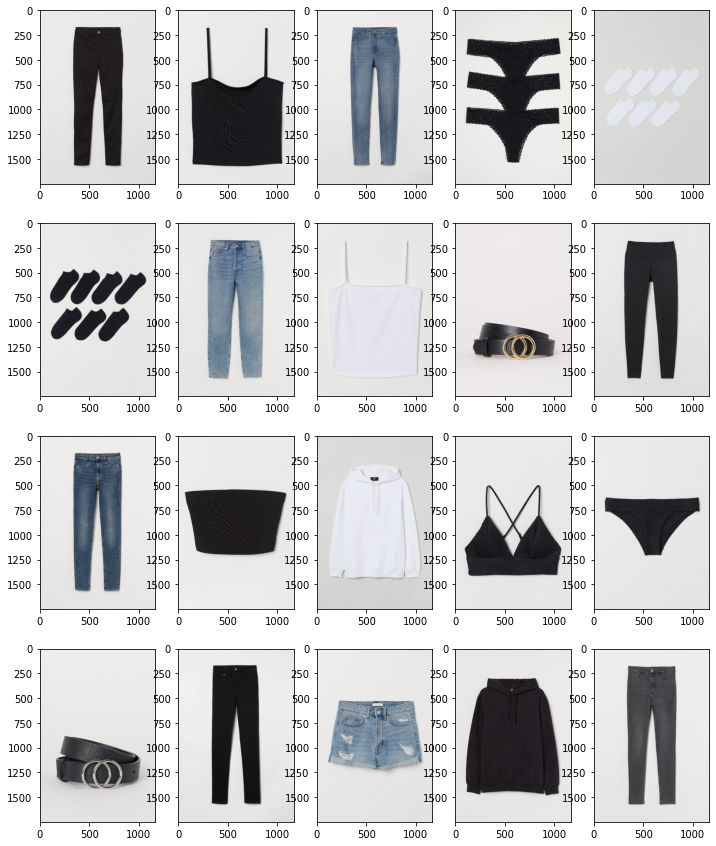

In [42]:
_ = sales_age[sales_age['age_group'] == bins[0]].sort_values('sold_count', ascending=False)[:20]
print(_)

visualize_items(_['article_id'], rows=4, columns=5)

       article_id     age_group  sold_count  customers_count
2771   0706016001  (21.0, 26.0]       15820             9725
2757   0706016002  (21.0, 26.0]        9854             7128
1367   0372860001  (21.0, 26.0]        9003             7067
16727  0156231001  (21.0, 26.0]        8980             3983
7382   0759871002  (21.0, 26.0]        8623             7018
15753  0610776002  (21.0, 26.0]        7270             5490
11701  0464297007  (21.0, 26.0]        7224             5372
16013  0448509014  (21.0, 26.0]        6798             4843
2786   0706016003  (21.0, 26.0]        6465             4920
12065  0399223001  (21.0, 26.0]        6438             4486
25496  0372860002  (21.0, 26.0]        6435             5271
55354  0720125001  (21.0, 26.0]        5733             4800
8619   0610776001  (21.0, 26.0]        5647             4176
13255  0673396002  (21.0, 26.0]        5537             4812
57502  0688537004  (21.0, 26.0]        4833             3853
18206  0562245046  (21.0

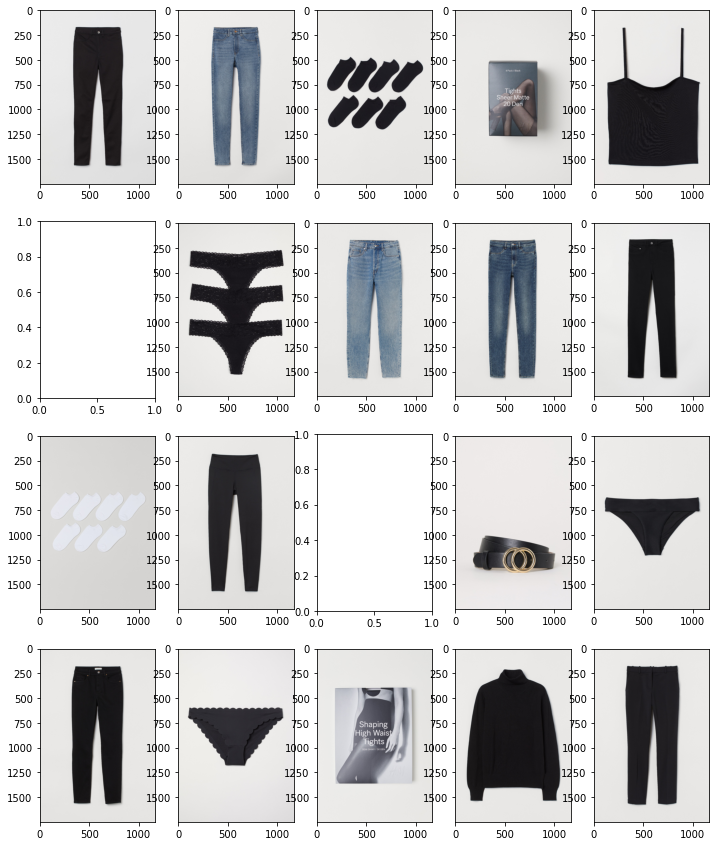

In [43]:
_ = sales_age[sales_age['age_group'] == bins[1]].sort_values('sold_count', ascending=False)[:20]
print(_)

visualize_items(_['article_id'], rows=4, columns=5)

        article_id     age_group  sold_count  customers_count
15755   0610776002  (31.0, 36.0]        2918             2192
2773    0706016001  (31.0, 36.0]        2575             1692
11703   0464297007  (31.0, 36.0]        2461             1739
25662   0562245001  (31.0, 36.0]        2346             1687
1369    0372860001  (31.0, 36.0]        2275             1929
34864   0608776002  (31.0, 36.0]        2141             1644
1384    0160442007  (31.0, 36.0]        2137             1202
10602   0158340001  (31.0, 36.0]        2136             1147
8621    0610776001  (31.0, 36.0]        2106             1592
18208   0562245046  (31.0, 36.0]        2000             1516
45999   0120129001  (31.0, 36.0]        1898             1306
52      0351484002  (31.0, 36.0]        1851             1296
23038   0717490008  (31.0, 36.0]        1824             1544
12790   0179123001  (31.0, 36.0]        1776              999
16175   0565379001  (31.0, 36.0]        1726             1068
176048  

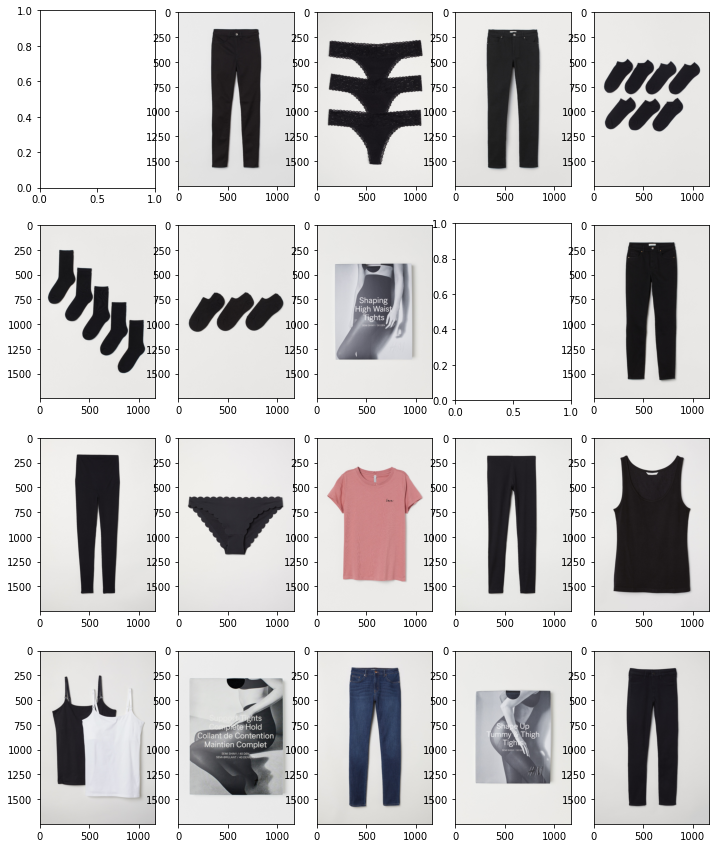

In [44]:
_ = sales_age[sales_age['age_group'] == bins[3]].sort_values('sold_count', ascending=False)[:20]
print(_)

visualize_items(_['article_id'], rows=4, columns=5)

       article_id     age_group  sold_count  customers_count
15756  0610776002  (36.0, 41.0]        1900             1368
2774   0706016001  (36.0, 41.0]        1572             1063
25663  0562245001  (36.0, 41.0]        1363              961
10241  0572797001  (36.0, 41.0]        1337              893
1370   0372860001  (36.0, 41.0]        1271             1049
16176  0565379001  (36.0, 41.0]        1228              764
34865  0608776002  (36.0, 41.0]        1219              923
39916  0399256001  (36.0, 41.0]        1209              886
8622   0610776001  (36.0, 41.0]        1191              882
12791  0179123001  (36.0, 41.0]        1169              746
65075  0562245018  (36.0, 41.0]        1106              859
11704  0464297007  (36.0, 41.0]        1099              792
2760   0706016002  (36.0, 41.0]        1078              808
4272   0768912001  (36.0, 41.0]        1067              621
28242  0568601006  (36.0, 41.0]        1054              765
10312  0572797002  (36.0

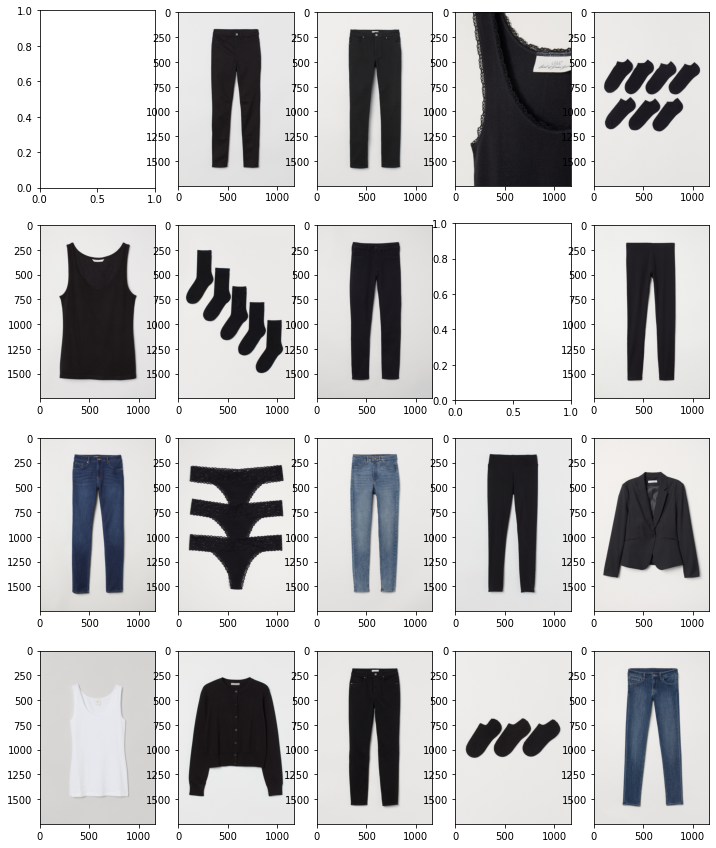

In [45]:
_ = sales_age[sales_age['age_group'] == bins[4]].sort_values('sold_count', ascending=False)[:20]
print(_)

visualize_items(_['article_id'], rows=4, columns=5)

       article_id     age_group  sold_count  customers_count
2775   0706016001  (41.0, 46.0]        2717             1806
2761   0706016002  (41.0, 46.0]        2205             1574
1371   0372860001  (41.0, 46.0]        2113             1653
15757  0610776002  (41.0, 46.0]        2084             1490
25500  0372860002  (41.0, 46.0]        1803             1448
39917  0399256001  (41.0, 46.0]        1736             1260
28243  0568601006  (41.0, 46.0]        1675             1328
10242  0572797001  (41.0, 46.0]        1657             1121
54     0351484002  (41.0, 46.0]        1603             1140
25664  0562245001  (41.0, 46.0]        1492             1067
8623   0610776001  (41.0, 46.0]        1473             1053
10313  0572797002  (41.0, 46.0]        1442              983
18210  0562245046  (41.0, 46.0]        1422             1114
13259  0673396002  (41.0, 46.0]        1400             1215
8824   0673677002  (41.0, 46.0]        1399             1163
49931  0579541001  (41.0

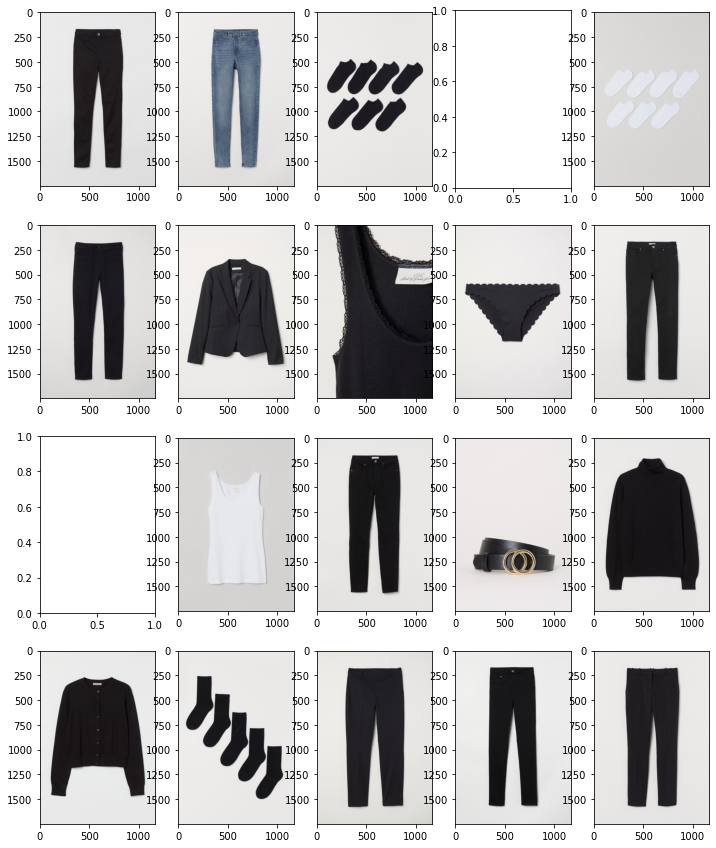

In [46]:
_ = sales_age[sales_age['age_group'] == bins[5]].sort_values('sold_count', ascending=False)[:20]
print(_)

visualize_items(_['article_id'], rows=4, columns=5)

       article_id     age_group  sold_count  customers_count
2776   0706016001  (46.0, 51.0]        4870             3103
2762   0706016002  (46.0, 51.0]        3929             2807
1372   0372860001  (46.0, 51.0]        3377             2680
25501  0372860002  (46.0, 51.0]        3306             2625
28244  0568601006  (46.0, 51.0]        3101             2376
15758  0610776002  (46.0, 51.0]        2678             1982
39918  0399256001  (46.0, 51.0]        2607             1884
8825   0673677002  (46.0, 51.0]        2597             2209
55     0351484002  (46.0, 51.0]        2470             1827
14866  0751471001  (46.0, 51.0]        2469             1849
13275  0573716012  (46.0, 51.0]        2221             1649
49932  0579541001  (46.0, 51.0]        2195             1871
18211  0562245046  (46.0, 51.0]        2175             1666
25665  0562245001  (46.0, 51.0]        2169             1580
34867  0608776002  (46.0, 51.0]        2148             1684
12070  0399223001  (46.0

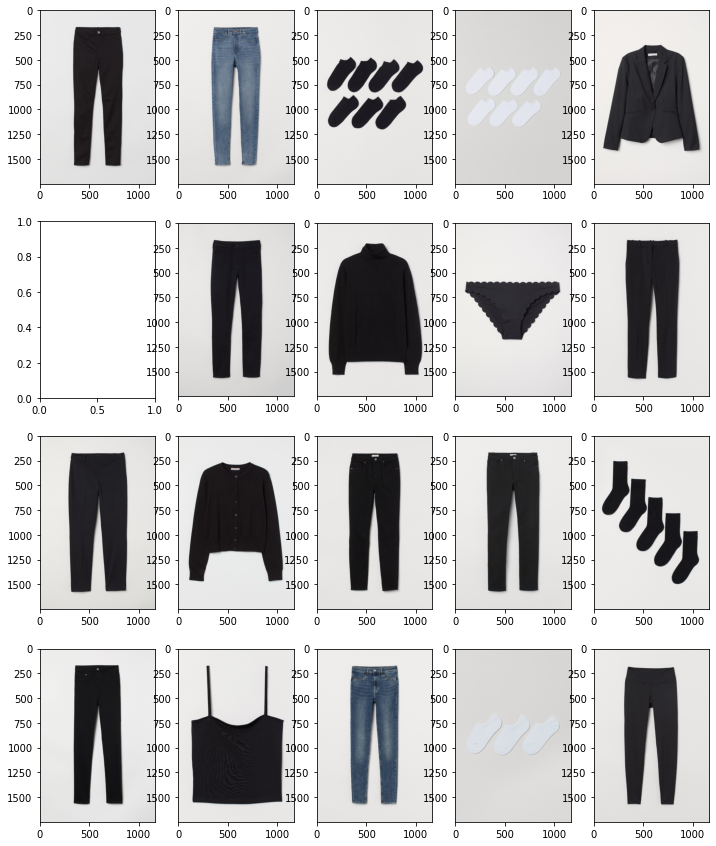

In [47]:
_ = sales_age[sales_age['age_group'] == bins[6]].sort_values('sold_count', ascending=False)[:20]
print(_)

visualize_items(_['article_id'], rows=4, columns=5)

       article_id     age_group  sold_count  customers_count
2777   0706016001  (51.0, 56.0]        3647             2308
2763   0706016002  (51.0, 56.0]        2677             1914
1373   0372860001  (51.0, 56.0]        2537             2035
28245  0568601006  (51.0, 56.0]        2442             1869
25502  0372860002  (51.0, 56.0]        2354             1872
14867  0751471001  (51.0, 56.0]        2230             1680
8826   0673677002  (51.0, 56.0]        2214             1872
15759  0610776002  (51.0, 56.0]        2191             1624
4194   0678942001  (51.0, 56.0]        2125             1715
49933  0579541001  (51.0, 56.0]        2097             1827
39919  0399256001  (51.0, 56.0]        1993             1491
13276  0573716012  (51.0, 56.0]        1887             1471
12071  0399223001  (51.0, 56.0]        1866             1316
18212  0562245046  (51.0, 56.0]        1859             1445
1348   0160442010  (51.0, 56.0]        1845              944
34868  0608776002  (51.0

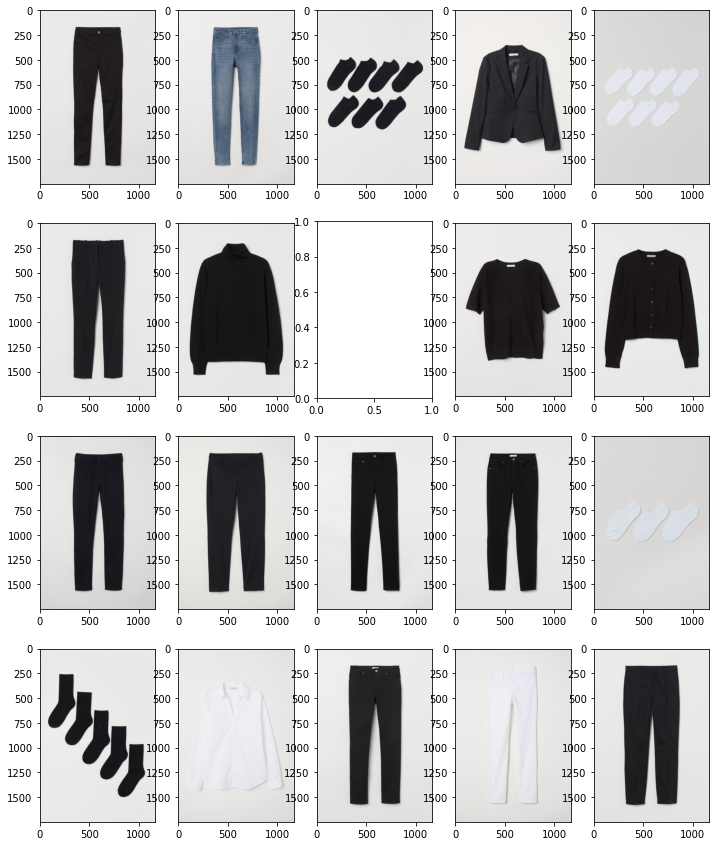

In [48]:
_ = sales_age[sales_age['age_group'] == bins[7]].sort_values('sold_count', ascending=False)[:20]
print(_)

visualize_items(_['article_id'], rows=4, columns=5)

       article_id     age_group  sold_count  customers_count
49934  0579541001  (56.0, 61.0]        1314             1159
2778   0706016001  (56.0, 61.0]        1289              856
4195   0678942001  (56.0, 61.0]        1285             1067
15760  0610776002  (56.0, 61.0]        1247              911
39920  0399256001  (56.0, 61.0]        1115              823
14868  0751471001  (56.0, 61.0]        1111              861
8827   0673677002  (56.0, 61.0]        1083              921
54040  0399256005  (56.0, 61.0]        1072              821
8626   0610776001  (56.0, 61.0]        1038              760
2764   0706016002  (56.0, 61.0]        1011              691
28246  0568601006  (56.0, 61.0]         979              773
25667  0562245001  (56.0, 61.0]         969              714
1349   0160442010  (56.0, 61.0]         965              530
13277  0573716012  (56.0, 61.0]         948              730
1374   0372860001  (56.0, 61.0]         920              776
34869  0608776002  (56.0

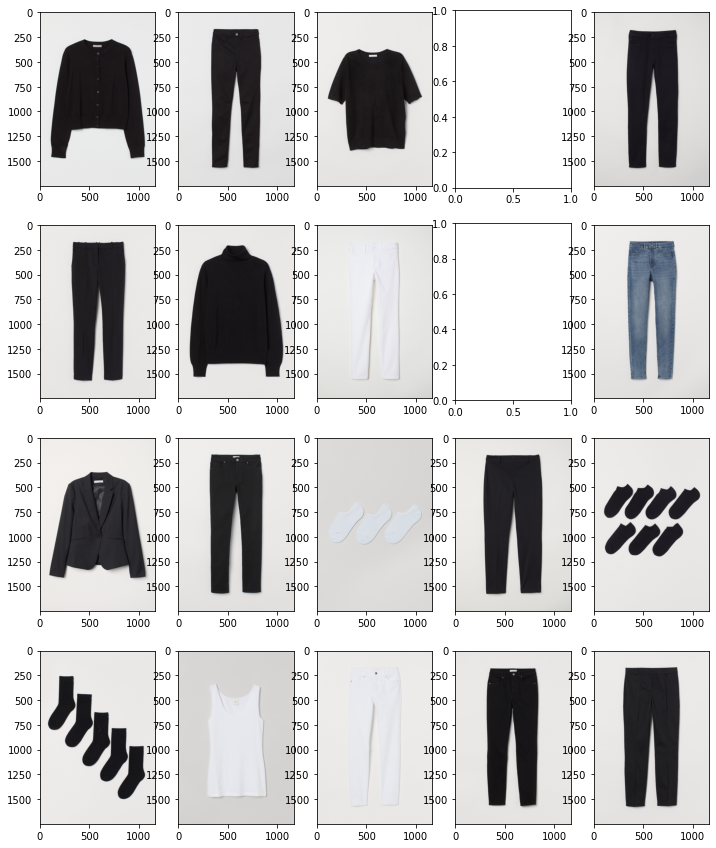

In [49]:
_ = sales_age[sales_age['age_group'] == bins[8]].sort_values('sold_count', ascending=False)[:20]
print(_)

visualize_items(_['article_id'], rows=4, columns=5)